In [11]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
import json

In [2]:
n_qubits = 3
circuit = QuantumCircuit(n_qubits, n_qubits)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0, 1, 2], [0, 1, 2])

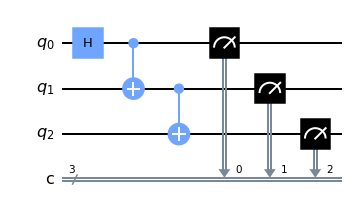

In [3]:
%matplotlib inline
circuit.draw('mpl')

In [4]:
simulator = Aer.get_backend('qasm_simulator')
simulator_result = execute(circuit, backend = simulator, shots = 1024).result()

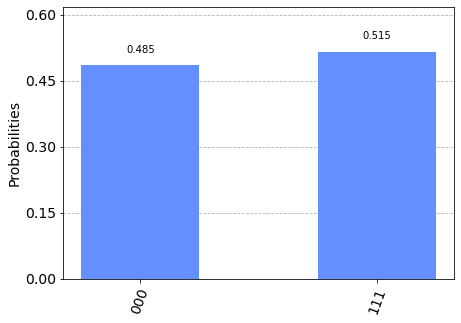

In [5]:
plot_histogram(simulator_result.get_counts(circuit))

In [10]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibmq_belem')

ibmqfactory.load_account:WARNING:2021-03-11 15:53:02,998: Credentials are already in use. The existing account in the session will be replaced.


In [21]:
json_job = open('604a287e91d49b1ed2ebd4e1-output.json') 
job = json.load(json_job)
print(job['results'])

[{'data': {'counts': {'0x0': 437, '0x1': 29, '0x2': 7, '0x3': 21, '0x4': 13, '0x5': 77, '0x6': 31, '0x7': 409}}, 'header': {'clbit_labels': [['c', 0], ['c', 1], ['c', 2]], 'creg_sizes': [['c', 3]], 'global_phase': 0.7853981633974483, 'memory_slots': 3, 'n_qubits': 5, 'name': 'circuit7', 'qreg_sizes': [['q', 5]], 'qubit_labels': [['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]}, 'meas_level': 2, 'memory': False, 'shots': 1024, 'success': True}]


In [ ]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [ ]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')

In [ ]:
cal_circuits[2].draw('mpl')

In [ ]:
cal_job = execute(cal_circuits, backend = device, shots = 1024, optimization_level = 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.results()

In [ ]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

In [ ]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

In [ ]:
meas_fitter.plot_calibration()

In [ ]:
meas_filter = meas_fitter.filter

In [ ]:
mitigated_result = meas_filter.apply(device_result)

In [ ]:
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend=['device - noisy', 'device - mitigated'])